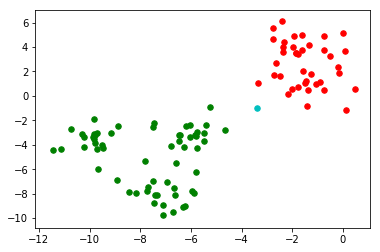

In [20]:
import pandas as pd
import numpy as np
import random
import operator
import math
from sklearn.datasets.samples_generator import make_blobs
from sklearn import datasets
import matplotlib.pyplot as plt
from matplotlib import style

x, y = make_blobs(n_samples=100, centers=5, n_features=2, random_state=1)
a, b = datasets.make_circles(n_samples=200, factor=.5, noise=.05)
c, d = datasets.make_moons(n_samples=200, noise=.05)

#df = pd.DataFrame.from_dict({'x':x})
df = pd.DataFrame(x)
# Number of Attributes
num_attr = len(df.columns) - 1

# Number of Clusters
k = 3

# Maximum number of iterations
MAX_ITER = 100

# Number of data points
n = len(df)

# Fuzzy parameter
m = 2.00


def initializeMembershipMatrix():
    membership_mat = list()
    for i in range(n):
        random_num_list = [random.random() for i in range(k)]
        summation = sum(random_num_list)
        temp_list = [x/summation for x in random_num_list]
        membership_mat.append(temp_list)
    return membership_mat


def calculateClusterCenter(membership_mat):
    cluster_centers = list()
    for j in range(k):
        x = list(membership_mat[j])
        #xraised = [e ** m for e in x]
        xraised = list(map(lambda x: x ** m, x))
        denominator = sum(xraised)
        temp_num = list()
        for i in range(len(xraised)):
            data_point = list(df.iloc[i])
            prod = [xraised[i] * val for val in data_point]
            temp_num.append(prod)
        numerator = map(sum, zip(*temp_num))
        center = [z/denominator for z in numerator]
        cluster_centers.append(center)
    return cluster_centers


def updateMembershipValue(membership_mat, cluster_centers):
    p = float(2/(m-1))
    for i in range(n):
        x = list(df.iloc[i])
        distances = [np.linalg.norm(list(map(operator.sub, x, cluster_centers[j]))) for j in range(k)]
        for j in range(k):
            den = sum([math.pow(float(distances[j]/distances[c]), p) for c in range(k)])
            if den == 0:
                print('{} index is 0.'.format(j))
            membership_mat[i][j] = float(1/den)       
    return membership_mat

def fuzzyCMeansClustering():
    # Membership Matrix
    membership_mat = initializeMembershipMatrix()
    curr = 0
    cluster_centers = None
    while curr <= MAX_ITER:
        previous = cluster_centers
        cluster_centers = calculateClusterCenter(membership_mat)
        membership_mat = updateMembershipValue(membership_mat, cluster_centers)
        #cluster_labels = getClusters(membership_mat)
        isOptimal = True
        
        if previous == None:
            break
            
        '''    for center in cluster_centers:
                original = previous[center]
                current = self.centers[center]
                if np.sum( (current - original) / original * 100.0) > self.tolerance:
                    isOptimal = False
            if isOptimal:
                break
        '''
        
        curr += 1
    #print(membership_mat)
    #return cluster_labels, cluster_centers
    return cluster_centers, membership_mat


#labels, centers = fuzzyCMeansClustering()
centers, mems = fuzzyCMeansClustering()
classes = {}
colors = 10*["r", "g", "c", "b", "k"]

for i in range(k):
    classes[i] = []

index = 0
for value in x:
    classification = mems[index].index(max(mems[index]))
    classes[classification].append(value)
    index += 1
for classification in classes:
    color = colors[classification]
    for features in classes[classification]:
        plt.scatter(features[0], features[1], color = color,s = 30)
    
plt.show()
